# Analysis of PGA Tour Data from 2015 - 2022

This data set was made available from Kaggle thanks to Rob Mulla. My goal for this dataset is to practice some data cleaning and statistical testing.
I personally love golf, but I am terrible at it so I really need to dive in and see what the pros do that makes them so good. Personally, I don't think it 
has anything to do with putting or consistent practice, but instead its probably due to hitting 400 yard bombs and having the newest clubs......or maybe thats what I want it to be cause thats easy....lets find out.

Step 1 - Import necessary packages

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Step 2 - Load the data

In [34]:
golf = pd.read_csv('PGATOUR_data2.csv')
golf = golf[~ pd.isnull(golf['Player'])] #filter out rows that don't have any player data

Get a glance at the data

In [38]:
golf.describe()

,EVENTS_PLAYED,POINTS,NUMBER_OF_WINS,NUMBER_OF_TOP_Tens,POINTS_BEHIND_LEAD,ROUNDS_PLAYED,SG_PUTTING_PER_ROUND,TOTAL_SG:PUTTING,MEASURED_ROUNDS,AVG_Driving_DISTANCE,...,AVG_CARRY_DISTANCE,LONGEST_CARRY_DISTANCE,SHORTEST_CARRY_DISTANCE,AVG_SCORE,TOTAL_STROKES,TOTAL_ROUNDS,MAKES_BOGEY%,BOGEYS_MADE,HOLES_PLAYED,AGE
count,195.000000,195.000000,195.000000,195.000000,194.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,24.174359,745.974359,0.241026,2.651282,4896.262887,78.358974,0.051708,3.111672,59.928205,296.756923,...,278.155385,305.030769,244.854359,70.893369,5328.810256,75.497436,16.483897,222.194872,1359.000000,32.887179
std,4.151805,700.518059,0.599277,2.201554,608.024609,14.039134,0.313897,18.320074,13.997606,8.191270,...,10.060564,12.552019,13.149478,0.820646,1005.287126,14.465520,2.095008,41.704446,260.378571,5.668469
min,15.000000,10.000000,0.000000,0.000000,2328.000000,46.000000,-0.750000,-42.673000,30.000000,278.400000,...,249.800000,271.600000,192.800000,68.702000,3261.000000,45.000000,12.200000,123.000000,810.000000,21.000000
25%,21.000000,267.500000,0.000000,1.000000,4592.750000,67.000000,-0.146500,-8.024000,49.000000,291.050000,...,270.900000,295.600000,237.050000,70.440500,4529.000000,64.000000,15.205000,193.500000,1152.000000,29.000000
50%,24.000000,587.000000,0.000000,2.000000,5037.000000,80.000000,0.059000,3.967000,60.000000,296.200000,...,278.200000,304.500000,245.900000,70.850000,5379.000000,76.000000,16.280000,223.000000,1368.000000,33.000000
75%,27.000000,1038.000000,0.000000,4.000000,5349.750000,88.500000,0.237000,14.503000,70.000000,301.650000,...,283.950000,313.600000,253.100000,71.324000,6106.500000,87.000000,17.420000,251.000000,1566.000000,36.000000
max,32.000000,5617.000000,3.000000,11.000000,5607.000000,110.000000,0.862000,60.061000,92.000000,320.200000,...,302.600000,337.700000,275.700000,74.891000,7515.000000,107.000000,28.250000,330.000000,1926.000000,49.000000


Question 1: Is average driving distance associated with total amount of strokes a player takes.

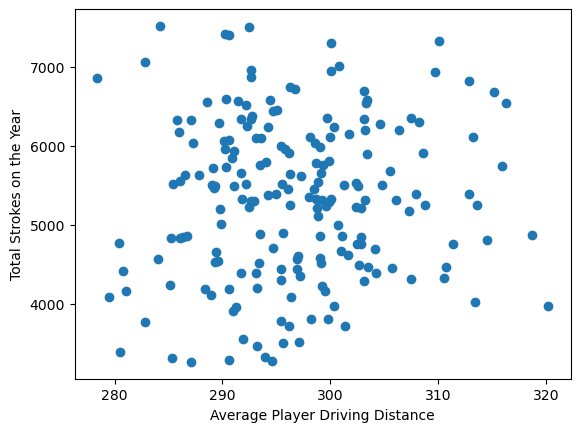

In [51]:
drive_stroke = golf[["AVG_Driving_DISTANCE", 'TOTAL_STROKES']] #create a new dataframe that has the two columns of interest.

#Create a scatter plot looking at the relationship between the two variables.
plt.scatter(drive_stroke["AVG_Driving_DISTANCE"], drive_stroke["TOTAL_STROKES"])
plt.xlabel("Average Player Driving Distance")
plt.ylabel("Total Strokes on the Year")
plt.show()

At first glance, there doesn't seem to be very much correlation between the two variables and if there is one might expect higher average
driving distances to have lower total strokes on the year but that doesn't seem to be what the scatter plot shows. I might be wrong about needing to hit
400 yard bombs. Lets look into it a little more.

In [58]:
correlation_matrix = np.corrcoef(drive_stroke["AVG_Driving_DISTANCE"], drive_stroke["TOTAL_STROKES"])
correlation_coefficient = correlation_matrix[0,1]
print(correlation_coefficient) #output: 0.068. Suggests a weak relationship.

0.06888253372444468


Average driving distance and Total strokes for the year didn't quite have the relationship one might expect, but it did lead me to another question.
Is a golfers age associated with average driving distance?

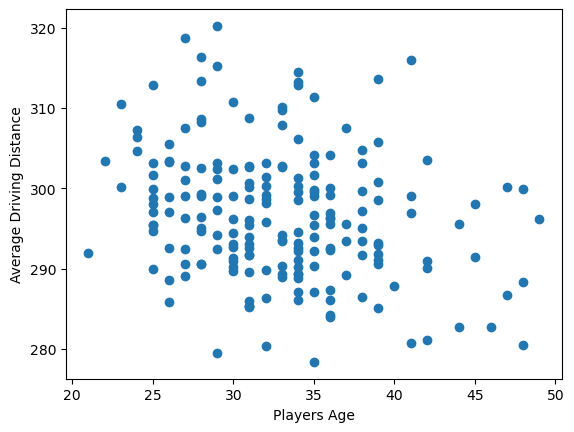

In [63]:
age_distance = golf[["AVG_Driving_DISTANCE", "AGE"]]

#Create a scatter plot looking at the relationship between the two variables.
plt.scatter(age_distance["AGE"], age_distance["AVG_Driving_DISTANCE"])
plt.xlabel("Players Age")
plt.ylabel("Average Driving Distance")
plt.show()

In [65]:
correlation_matrix = np.corrcoef(age_distance["AGE"], age_distance["AVG_Driving_DISTANCE"])
correlation_coefficient = correlation_matrix[0,1]
print(correlation_coefficient) #output: -0.2516 Suggests a weak inverse relationship.

-0.2516427889810524
